# Math 502

## Lecture 4 - January 22.

### M. Lamoureux

###  Wrapping up the traffic model.

Looking back at lectures 2 and 3, we have a nice traffic flow model which we have put into code. With the benefit of hindsight, we can clean up the code and make something that is nice.

Recall we have two functions, flux $q(x,t)$ which measures the number of cars per second that pass a spot, and density $\rho(x,t)$ which measures number of cars per meter at any point on the road. They are related by the equation
$$ q(x,t) = v\cdot \rho(x,t),$$
where $v$ is the velocity of the cars. Checking units, we see $v$ is measures in meters per second. 

The differential equation we need to solve is
$$\frac{\partial \rho}{\partial t} + \frac{\partial q}{\partial x} = 0.$$
(Again, you might want to check units, to see that this equation makes physical sense. )

When $v=v(x)$ depends only on position, we have a solution given by defining the antiderivative of slowness
$$S(x) = \int_0^x \frac{1}{v(x')} \, dx',$$
and then set
$$ q(x,t) = f(S(x) - t), \qquad \rho(x,t) = \frac{1}{v(x)} f(S(x) - t).$$
Here, $f$ is an arbitrary bump function representing the inital density of cars. 

### Nice code

We can set up our code for the simple case where the velocity $v(x)$ takes one value to the left of the origin, and another value to the right of the origin. Then $S(X)$ should take values
$$S(x) = \frac{x}{v_{left}} \mbox{ for } x<0; S(x) = \frac{x}{v_{right}} \mbox{ for } x>0.$$
The rest of the code is as in Lecture 3.

In [1]:
## Import some key functions
from numpy import *
from matplotlib.pyplot import *
from ipywidgets import interact

In [26]:
## define our key constants

# velocities
v_left = 30  #(meters/sec)
v_right = 15 #(meters/sec)

# width of the bump of cars
width = 100 # (meters)

# range of x values we explore
x_range = 500. #(meters)

t_min = -x_range/v_left #(seconds)
t_max = x_range/v_right #(seconds)



## Key functions

# we use absolute value function, so Python knows how to handle a vector input. 
def v(x):
    return (v_right + v_left)/2 + (v_right - v_left)*sign(x)/2 

def S(x):
    return (1/v_right + 1/v_left)*x/2 + (1/v_right - 1/v_left)*abs(x)/2 

# check units! We observe the bump function expects a time variable! So scale the width appropriately

def bump(t):
    return exp((-t**2)/((width/(2*v_left))**2))

def update(t=0):
    plot(x,bump(S(x)-t)/v(x))
    
x = linspace(-x_range,x_range,100)
interact(update,t=(t_min,t_max,.1));

interactive(children=(FloatSlider(value=0.0, description='t', max=33.333333333333336, min=-16.666666666666668)…

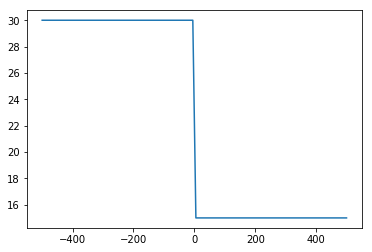

In [23]:
## Sanity check
plot(x,v(x))

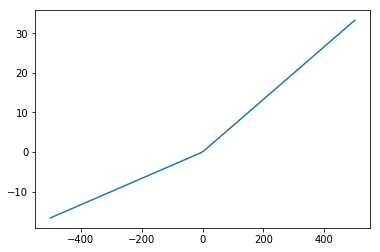

In [24]:
## sanity check
plot(x,S(x))

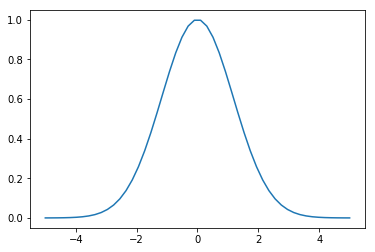

In [25]:
## sanity check
t = linspace(-5,5)
plot(t,bump(t))

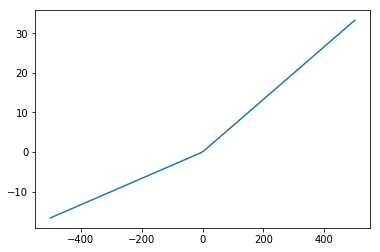

In [27]:
plot(x,S(x))

## Exercise 1

Replace the jump function for $v(x)$ with a smooth, monotonic function that has a left limit of $v_left$ and a right limit of $v_right$. Choose a function where it is easy to compute the antiderivative of slowness $1/v(x)$. 

Hint: Rational functions won't work. (Exercise 1a. Why not?) You might want to consider functions like arctan $\tan^{-1}(x)$ or hyperbolic tan $\tanh(x)$. 

## Exercise 2

Adjust the code above to use your new definition of $v(x)$ and the resulting $S(x).$

## The traffic jam situation.

Suppose, instead, that the velocity depends on the density $\rho$. This is a hypothesized law, suggesting that car drivers will tend to go faster if there is a lot of space on the road, and will slow down if the density increases. (Think about how you drive in congested traffic -- if there are lots of cars, you have to slow down to give you enough stopping distance to feel safe.)

A simple model for a situation like this would be a formula like
$$ v = 1-\rho, \mbox{ where we assume density is between 0 and 1.}$$
In this case, the flux is $q = \rho(1-\rho)$ and so the local wave speed is 
$$\frac{dq}{d\rho} = 1 - 2\rho,$$
which is positive or negative depending on whether the density is below or above $1/2$. 

The differential equation becomes
$$\rho_t + (1-2\rho)\rho_x = 0,$$
which is non-linear, but simple enough that we can solve it numerically. (Maybe even analytically). What we do observe is that if at some point $x$ on the road, if $\rho > 1/2, \mbox{and} \rho_x >0$, then the density will be increasing with time. While if $\rho < 1/2, \mbox{and} \rho_x >0$, the density will be decreasing with time. This will tend to form a "shock wave" in the density of cars. That is, if there is a point on the road where the density passes from below 1/2 to above 1/2, the density before that point decreases, while the density after that point increases. This continues until you get the sharp shock wave. Your car sees this as a transition into a very dense, slow moving region of cars, following by the clearing out of the road as you move into the rarified region after the shock. 

It's kind of a pain to insert a diagram in Jupyter. Maybe you (the student) can come up will a better way to plug in an image. But here is one from Fowler's book. 

![Image from Fowler text](images/Fowler_fig1_1_cropped.jpg)

## Numerical experiments
We might as well see if we can solve this numerically. It's a first order PDE, in only 2 variables, so it seems like it should be easy.

Take the equation:
$$ \rho_t = (2\rho-1)\rho_x$$
and solve it by time-stepping. The discrete time derivative
$$\frac{\rho(x,t + \Delta t) - \rho(x,t)}{\Delta t} = (2\rho-1)\rho_x(x,t)$$
unravels into the time step formula:
$$\rho(x,t + \Delta t) = \rho(x,t) + (\Delta t) (2\rho-1)\rho_x(x,t).$$

I did this originally in Julia. So we can either switch kernels in this notebook, or re-write it in Python. Let's see how it goes in class.

Here is how we do it in Julia. 

so we will need to load in PyPlot for our plots. The rest is easy.

In [1]:
using PyPlot

4

In [2]:
# Let's set up some initial parameters to define the problem
x0 = 0
x1 = 10
t0 = 0
t1 = 10
Nx = 100
Nt = 1000
dx = (x1-x0)/Nx
dt = (t1-t0)/Nt
x = linspace(x0,x1,Nx)
t = linspace(t0,t1,Nt)

3.375

In [ ]:
# We now set up the solution matrix
# and include some initial values for rho (as a Gaussian).
# Then we solve via time stepping

p = zeros(Nx,Nt)
px = zeros(Nx,1)  # this will be the x derivative, computed by central differences
p[:,1] = p0 = .7*exp(-(x-5).^2/1^2) # The initial density at time zero
for k in 1:(Nt-1)
    px[2:(Nx-1)] = (p[3:Nx,k]-p[1:(Nx-2),k])/(2*dx)
    p[:,k+1] = p[:,k] + dt*(2*p[:,k]-1).*px
end

In [3]:
# We plot a few curves as time advances. Time t=0 is amplified, so we see where we start.
plot(x,1.1*p[:,1],x,p[:,25],x,p[:,50],x,p[:,75],x,p[:,100])

Do some experients with this code
- adjust the size of the Gaussian (height, width)
- heights that go over 1/2 seem to be important, according to Fowler. Verify. 
- for small heights, we should see a wave propagating. Verify. Check the speed. Verify the direction.
- Note that Michael found an error in his code using these simple tests. Tests are important!
- is the code stable? What happens for large values of the time index?

## Python

Let's repeat this in Python, since we're getting good at Python

In [1]:
## First load in the tools we need
from numpy import *
from matplotlib.pyplot import *
from ipywidgets import interact

In [79]:
# Let's set up some initial parameters to define the problem
x0 = 0
x1 = 10
t0 = 0
t1 = 10
Nx = 1000
Nt = 10000
dx = (x1-x0)/Nx
dt = (t1-t0)/Nt
x = linspace(x0,x1,Nx)
t = linspace(t0,t1,Nt)

In [107]:
# We now set up the solution matrix
# and include some initial values for rho (as a Gaussian).
# Then we solve via time stepping

## Notice we have to change the syntax into Python

p = zeros((Nx,Nt))
px = zeros(Nx)  # this will be the x derivative, computed by central differences
p[:,0] = p0 = .1*exp(-(x-5)**2/1**2) # The initial density at time zero
for k in range(Nt-1):
    px[1:(Nx-1)] = (p[2:Nx,k]-p[0:(Nx-2),k])/(2*dx) # compute the x derivative
    px[0] = px[1]   # extrapolate to edges
    px[Nx-1] = px[Nx-2]
    p[:,k+1] = p[:,k] + dt*(2*p[:,k]-1)*px ## time stepping


/Users/mikel/anaconda3/envs/JupyterFull/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in multiply
  
/Users/mikel/anaconda3/envs/JupyterFull/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in add
  
/Users/mikel/anaconda3/envs/JupyterFull/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


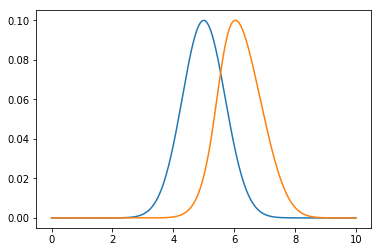

In [108]:
plot(x,p[:,0],x,p[:,1300]);

In [106]:
def plotIt(t):
    k = round(t*(Nt-1)/(t1-t0))
    plot(x,p[:,k])
    
interact(plotIt,t=(t0*1.0,t1*1.0))
    

interactive(children=(FloatSlider(value=5.0, description='t', max=10.0), Output()), _dom_classes=('widget-inte…

<function __main__.plotIt(t)>

In [61]:
size(p)

1000000

In [64]:
p.shape

(1000, 1000)

In [65]:
x.shape

(1000,)

In [66]:
p0.shape

(1000,)

In [68]:
px.shape

(1000,)

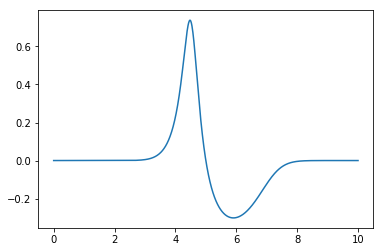

In [71]:
plot(x,px)

## Review.

Let's review our process of math modeling, applied to this traffic flow problem.

Recall the six steps. How do each of these apply here?

### The procedure of modeling

**1.** Problem identification

Identify a problem. Something we don't understand, a phenomena that needs an explanation. Try to identify a mechanism that explains the phenomena. 

**2.** Model formulation

Once identified, the mechanism should be formulated mathematically. Identify variable, and their dependences, and formulate as systems of equations (with boundary conditions, as well as evolution equations). Often we rely on physical laws (e.g. conservation of mass, of energy), empirical laws (e.g. friction), or hypothesized laws (e.g. rates of predation depends on the product of the number of predators time the number of prey). Simpler models are often more useful than complex models for understanding key phenomena -- more complex models can be created as needed. (We should think about well-posedness of the problem as we develop the model.)

**3.** Reduction

To get to a solution, it is sometimes important to remove unnecessary terms in the model. One way to approach this is to non-dimensionalize the problem, in order to discover which terms are unusually large or unusually small (relative to other terms). This leads to asymptotic methods that we hear so much about.

**4.** Analysis

Analytic dissection is the process of breaking up a complicated model into various simpler components -- for instance, components that work at different time scales, or length scales. (For instance, in modeling ocean waves, you might distinguish between long, slow waves that travel large distances, and the smaller wavelets generated by gusts of wind.) Each individual component may represent a problem to be solved on its own, and then all the pieces brought together for a final model. In many cases, exact analytic solutions can be obtained for the component pieces, 

**5.** Computation

Numerical computation can be used to solve the original problem, the component pieces, or to link together the results of the analysis of the component pieces. All are options, and all have their use in various modeling.

**6.** Model validation

The mathematical model must go back to the original problem, to see if the model and analysis explains the phenomena being studies. Do the computed data match the experimental data? Does predicted stability (or regions of stability) in the model match the observed stabiity of the process. Fowler make the point that the justification of the model is often that the various choices we made in developing the model are seen to work. 

## Dimensional analysis.

Does dimensional analysis apply here? Maybe not. Or maybe we were sloop, and didn't keep track of things properly.

Let's state a theorem about dimensional analysis.

## Buckingham Pi Theorem
This is a precise statement of how and when we can non-dimensionlize a problem, and even how we can deduce an answer to some aspect of a physical problem, from the given parameters without a long calculation. It is a formalization of the procedures we saw in the examples above.

## Statement of Buckingham Pi Theorem
Suppose we have a physical model with $n$ physical variables and parameters, 
$$Q_1, Q_2, \ldots, Q_n $$
in $r$ independent basic physical dimensions (like length, time, etc).

Then we can find $k = n-r$ independent dimensionless combinations of the physical parameters, say
$$\Pi_1, \Pi_2, \ldots, \Pi_k$$
where each $\Pi_j$ is a product of powers of the $Q_i$'s. 

Moverover, if the solution of the model gives one variable $Q_n$ in terms of the others, say
$$Q_n = f(Q_1, Q_2, \ldots, Q_{n-1}),$$
then there is a function $g$ with
$$\Pi_k = g(\Pi_1, \Pi_2, \ldots, \Pi_{k-1}),$$
perhaps with some re-ordering of the variables.

## Proof
The core of the proof is the rank theorem. If you have a $r\times n$ matrix in general form (i.e. with full rank), then the dimension of its null space is $k=n-r$. So this theorem really should have some conditions on it to ensure the given matrix is of full rank. So you might want to think about you would impose such a condition on your selection of physical parameters. (Apparently they need some kind of independence.) 

The idea then is to create a $r \times n$ matrix $M$ which expresses the relationship between the variables $Q_1, \ldots, Q_n$ and the basic physical dimensions (call them $D_1, D_2, \ldots D_r$). Specifically, the  entries $M_{ij}$ of the matrix $M$ are given by expressing the units of each $Q_j$ in terms of powers of the physical units, so
$$[Q_j] = [D_1]^{M_{1j}} [D_2]^{M_{2j}} \ldots [D_r]^{M_{2r}}.$$
To find a dimensionless parameter $\Pi$, we want to write it as a product of powers
$$\Pi = Q_1^{a_1} Q_2^{a_2} \ldots Q_n^{a_n},$$
with the condition that
$$M a = 0.$$
Since the kernel of $M$ has dimension $k=n-r$, we can find exactly $k$ linearly independent vectors $a$ to solve this problem. Each one of these $a$ gives an independent, dimensionless variable $\Pi_i$. 

Note that we typically have integer entries for $M$, so vectors in the kernel can be scaled to rationals. (That is, we solve the matrix equation over the field of rationals.) Then bringing to a common denomiator, we can rescale the vectors $a$ to be integer-valued. 

As for solving for one parameter in terms of the other, if the physical system has a solution, we can write it as the solution to some equation
$$0 = F(Q_1, Q_2, \ldots, Q_n),$$
for some function $F$. Changing variables to the $k$ independent, dimensionless variables, we get an equivalent equations
$$0 = G(\Pi_1, \Pi_2, \ldots, \Pi_k).$$
Using the inverse function theorem, we can solve for one variable in terms of the other, as
$$\Pi_k = g(\Pi_1, \Pi_2, \ldots, \Pi_{k-1}).$$

That's it for the "proof." Now go wash your hands because that was a very dirty proof with lots of assumptions about math (e.g. when can we use the inverse function theorem? What does it mean for parameters to be independent?) and the physics (what does it mean to solve?) that I don't really know how one can justify!

### Example using the Buckinham Pi theorem
Take a simple pendulum of length $L$, mass $m$, under gravity of magnitute $g$, and for small oscillations, we assume it has a period of time length $T$. Here we have $n=4$ physical parameters ($L,m,g,T$), and $r=3$ units of dimension (mass, time and length). So we expect $k=1$ dimensionless parameter to describe the problem. We could guess it, but lets use this matrix method. Here, we express the units of $T,m,L,g$ in terms of powers of the basic dimensions, so 
$$
\begin{array}{ccccc} T&m&L&g&\qquad\qquad \end{array}  \\
\begin{array}{ccccc}
1&0&0&-2&\mbox{time unit}\\
0&1&0&0&\mbox{mass unit}\\
0&0&1&1&\mbox{length unit}
\end{array}  $$
This gives our matrix
$$M = 
\left[\begin{array}{cccc}
1&0&0&-2\\
0&1&0&0\\
0&0&1&1
\end{array} \right] $$
and we easily find one independent vector in the kernel as
$$ \mathbf{a} = 
\left[
\begin{array}{c}
2\\
0\\
-1\\
1
\end{array}
\right].
$$
This gives us immediately our dimensionless parameter
$$\Pi = T^2m^0L^{-1}g^1 = \frac{gT^2}{L}.$$
Since there is only the one parameter, the physical problem must be solved in general as
$$\frac{gT^2}{L} = k^2, \mbox{ a constant }.$$

We don't know (yet) what this constant is, but we can now solve for $T$ in terms of the other physical parameters, so
$$ T = k\sqrt{\frac{L}{g}},$$
which already tells us a lot. For instance, the period $T$ is independent of the mass $m$. Doubling the length increases the period by only $\sqrt{2}$. Doubling the force of gravity decreases the period by $\sqrt{2}$ (i.e. the pendulum swings faster.) Apparently Newton used this fact to show that the earth is not a perfect sphere. (As you get closer to the north pole, gravity increases slightly because the radial distance to the centre of the earth is getting smaller. Cederic Villani states that this was measured with a pendulum!) A careful experiment, or an exact solution to the linearized ODE for the problem will find that in fact $k=2\pi$, so 
$$ T = 2\pi\sqrt{\frac{L}{g}}.$$

For instance, with a meter long pendulum, and $g = 9.81 m/s$, we find $T = 2.006 $ seconds. Which might be useful to know some day. A Royal pendulum has a length of $.994$ meters, which gives a half-period of almost exactly one second. 

